## Gathering image_predictions.tsv file from Udacity 

In [1]:
import requests
import os
from io import BytesIO
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url)
with open('Downloads'+'/'+'tweet_image.tsv','wb')as f:
    f.write(r.content)

In [2]:
import pandas as pd
df=pd.read_csv('tweet_image.tsv',sep='\t')
df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [3]:
### programmatically assessing the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## Gathering twitter_archive_enhanced

In [4]:
### importing the twitter-archive-enhanced.csv
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json

twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [5]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

# Gathering data from the Twitter API (tweet_json)

In [6]:
import tweepy
import configparser
import json

In [7]:
my_api_key = "HIDDEN"
my_api_secret = "HIDDEN"

access_token='HIDDEN'
access_token_secret='HIDDEN'

auth=tweepy.OAuthHandler(my_api_key, my_api_secret)
auth.set_access_token(access_token,access_token_secret)
api=tweepy.API(auth,wait_on_rate_limit=True)

In [8]:
ids_on_twitter_archive=twitter_archive['tweet_id'].tolist()

In [9]:
list_of_tweets = []
tweets_not_found = []
for each_id in ids_on_twitter_archive:   
    try:
        list_of_tweets.append(api.get_status(each_id))
    except Exception as e:
        tweets_not_found.append(each_id)


In [10]:
list_of_dicts = []
for each_json_tweet in list_of_tweets:
    list_of_dicts.append(each_json_tweet._json)

with open('tweet_json.txt', 'w') as file:
        file.write(json.dumps(list_of_dicts, indent=4))

In [11]:
demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count'] 
        created_at = each_dictionary['created_at']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'url': url,
                             'created_at': created_at,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(demo_list, columns = ['tweet_id', 'favorite_count', 
                                                       'retweet_count', 'created_at',
                                                       'source', 'retweeted_status', 'url'])

In [12]:
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,33693,6969,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29219,5272,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,21973,3464,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36781,7191,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35177,7715,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...
2313,666049248165822465,88,36,Mon Nov 16 00:24:50 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2314,666044226329800704,246,115,Mon Nov 16 00:04:52 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2315,666033412701032449,100,36,Sun Nov 15 23:21:54 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2316,666029285002620928,112,39,Sun Nov 15 23:05:30 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


## Assessing

### 1. image_predictions

In [13]:
df.head(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [14]:
df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Quality
1. Many dog breeds are in lowercase
2. Non-descriptive columns
3. Erroneous datatype for tweet_id


### 2. twitter_archive_enhanced

In [16]:
twitter_archive.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
845,766423258543644672,NaN,NaN,2016-08-18 23:55:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Shadoe. Her tongue flies out of her mo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/766423258...,9,10,Shadoe,None,None,None,None
2113,670434127938719744,NaN,NaN,2015-11-28 02:48:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hank and Sully. Hank is very proud of the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670434127...,11,10,Hank,None,None,None,None
59,880872448815771648,NaN,NaN,2017-06-30 19:35:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ugh not again. We only rate dogs. Please don't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
323,834089966724603904,NaN,NaN,2017-02-21 17:18:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",DOGGO ON THE LOOSE I REPEAT DOGGO ON THE LOOSE...,NaN,NaN,NaN,https://twitter.com/stevekopack/status/8340866...,10,10,None,doggo,None,None,None
814,771014301343748096,NaN,NaN,2016-08-31 15:58:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Another pic without a dog in it? What am I sup...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/771014301...,7,10,None,None,None,None,None
897,759047813560868866,NaN,NaN,2016-07-29 15:27:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Spencer. He's part of the Queen's Guar...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759047813...,11,10,Spencer,None,None,None,None
1740,679503373272485890,NaN,NaN,2015-12-23 03:26:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dwight. He's a pointy pupper. Very doc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679503373...,8,10,Dwight,None,None,pupper,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None
545,805826884734976000,NaN,NaN,2016-12-05 17:31:15 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Duke. He is not a fan of the pupporazz...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/805826884...,12,10,Duke,None,None,None,None
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None


In [17]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
twitter_archive.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

### Quality
1. Erroneous datatype for tweet_id
2. Drop irrelevant columns
3. Missing columns: favourite_count and retweet_count
4. Retweets present in our dataframe (We only want original tweets)
5. Variables (doggo,floofer,pupper,puppo) should be merged in one column
### Tidiness

2. Remove expanded urls

### 3. tweet_json

In [19]:
tweet_json

,tweet_id,favorite_count,retweet_count,created_at,source,retweeted_status,url
0,892420643555336193,33693,6969,Tue Aug 01 16:23:56 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,29219,5272,Tue Aug 01 00:17:27 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,21973,3464,Mon Jul 31 00:18:03 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,36781,7191,Sun Jul 30 15:58:51 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,35177,7715,Sat Jul 29 16:00:24 +0000 2017,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
...,...,...,...,...,...,...,...
2313,666049248165822465,88,36,Mon Nov 16 00:24:50 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/4B7cOc1EDq
2314,666044226329800704,246,115,Mon Nov 16 00:04:52 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/DWnyCjf2mx
2315,666033412701032449,100,36,Sun Nov 15 23:21:54 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/y671yMhoiR
2316,666029285002620928,112,39,Sun Nov 15 23:05:30 +0000 2015,Twitter for iPhone,Original tweet,https://t.co/r7mOb2m0UI


In [20]:
tweet_json.describe()

,favorite_count,retweet_count
count,2318.000000,2318.000000
mean,7036.322261,2460.892148
std,10936.289921,4170.680807
min,0.000000,1.000000
25%,1218.750000,491.250000
50%,3038.500000,1142.500000
75%,8602.000000,2846.750000
max,144242.000000,70330.000000


In [21]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2318 non-null   object
 1   favorite_count    2318 non-null   int64 
 2   retweet_count     2318 non-null   int64 
 3   created_at        2318 non-null   object
 4   source            2318 non-null   object
 5   retweeted_status  2318 non-null   object
 6   url               2318 non-null   object
dtypes: int64(2), object(5)
memory usage: 126.9+ KB


In [22]:
# there's nothing uncommon with the descriptive statistics of this dataframe.

## Clean

In [23]:
# first we'll make a copy of all the dataframes where df is the dataframe for tweet_image
twitter_archive_clean = twitter_archive.copy()
df_clean = df.copy()
tweet_json_clean = tweet_json.copy() 

## Quality

### image_predictions
#### Erroneous datatype for tweet_id.

## Define
Convert the tweet_id column to string datatype

## Code

In [24]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype('str')

## Test

In [25]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


## dog breed names in lowercase
## Define

Capitalize all words found in columns 'p1', 'p2' and 'p3'.

## Code

In [26]:
df_clean['p1'] = df_clean['p2'].str.title()
df_clean['p2'] = df_clean['p2'].str.title()
df_clean['p3'] = df_clean['p3'].str.title()

## Test

In [27]:
df_clean.loc[:,['p1', 'p2', 'p3']].sample(12)

,p1,p2,p3
255,Norwegian_Elkhound,Norwegian_Elkhound,Cairn
1433,Chesapeake_Bay_Retriever,Chesapeake_Bay_Retriever,Malamute
793,Labrador_Retriever,Labrador_Retriever,Kuvasz
66,Lakeland_Terrier,Lakeland_Terrier,Toy_Poodle
1800,Great_Dane,Great_Dane,Leonberg
189,Norfolk_Terrier,Norfolk_Terrier,Lakeland_Terrier
1062,Italian_Greyhound,Italian_Greyhound,Boston_Bull
597,Jaguar,Jaguar,Zebra
2060,Labrador_Retriever,Labrador_Retriever,Redbone
802,Collie,Collie,Border_Collie


## Non-descriptive columns
## Define

Rename the non-descriptive columns to more meaningful ones

## Code

In [28]:
df_clean = df_clean.rename(columns={'jpg_url': 'image_url',
                                                                  'img_num': 'image_number',
                                                                 'p1': 'top_prediction',
                                                                  'p1_conf': 'top_pred_conf',
                                                                  'p2': 'second_prediction',
                                                                  'p2_conf': 'second_pred_conf',
                                                                  'p3': 'third_prediction',
                                                                  'p3_conf': 'third_pred_conf',
                                                                  'p1_dog': 'is_dog_top_pred',
                                                                  'p2_dog': 'is_dog_sec_pred',
                                                                  'p3_dog': 'is_dog_third_pred',
                                                                 })

## Test

In [29]:
df_clean.tail()

,tweet_id,image_url,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,English_Springer,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador_Retriever,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Malamute,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Pekinese,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Bagel,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False


# twitter_archive

## Tidiness

## Define

Remove expanded URLs

## Code

In [30]:
twitter_archive_clean = twitter_archive_clean.drop('expanded_urls',axis=1)

## Test

In [31]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  floofer                     2356 

In [38]:
twitter_archive_clean['tweet_id'] = twitter_archive_clean['tweet_id'].astype('str')

In [39]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean.loc[:, ['tweet_id','url']], 
                                  on='tweet_id',how= 'left')

In [40]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   rating_numerator            2356 non-null   int64  
 10  rating_denominator          2356 non-null   int64  
 11  name                        2356 non-null   object 
 12  doggo                       2356 non-null   object 
 13  floofer                     2356 

## Quality

### Retweets present in our dataframe (We only want original tweets)

### Define

Drop the columns related to retweets and replies

### Code

In [41]:
twitter_archive_clean = twitter_archive_clean.drop(['retweeted_status_id', 
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'in_reply_to_status_id', 
                                                    'in_reply_to_user_id'],
                                                   axis=1)

### Test

In [42]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   timestamp           2356 non-null   object
 2   source              2356 non-null   object
 3   text                2356 non-null   object
 4   rating_numerator    2356 non-null   int64 
 5   rating_denominator  2356 non-null   int64 
 6   name                2356 non-null   object
 7   doggo               2356 non-null   object
 8   floofer             2356 non-null   object
 9   pupper              2356 non-null   object
 10  puppo               2356 non-null   object
 11  url                 2318 non-null   object
dtypes: int64(2), object(10)
memory usage: 239.3+ KB


### variables (doggo, floofer, pupper, puppo) should be merged in one column

### Define

Merge the four variables in one column

### Code

In [43]:
twitter_archive_clean['doggo'].replace('None', '', inplace=True)
twitter_archive_clean['floofer'].replace('None', '', inplace=True)
twitter_archive_clean['pupper'].replace('None', '', inplace=True)
twitter_archive_clean['puppo'].replace('None', '', inplace=True)

In [44]:
twitter_archive_clean['stage'] = (twitter_archive_clean['doggo'] + 
                                    twitter_archive_clean['floofer'] + 
                                    twitter_archive_clean['pupper'] + 
                                    twitter_archive_clean['puppo'])

In [45]:
twitter_archive_clean['stage'].replace('', 'unidentified', inplace=True)

In [46]:
twitter_archive_clean = twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

### Test

In [47]:
twitter_archive_clean['stage'].value_counts()

unidentified    1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggopuppo         1
doggofloofer       1
Name: stage, dtype: int64

In [48]:
twitter_archive_clean.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://t.co/MgUWQ76dJU,unidentified
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://t.co/aQFSeaCu9L,unidentified
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://t.co/r0YlrsGCgy,unidentified
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://t.co/tD36da7qLQ,unidentified
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://t.co/0g0KMIVXZ3,unidentified
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,None,https://t.co/xx5cilW0Dd,unidentified
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,https://t.co/MV01Q820LT,unidentified
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,None,https://t.co/hrcFOGi12V,unidentified
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,https://t.co/UkrdQyoYxV,unidentified
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,https://t.co/l3TSS3o2M0,doggo


In [49]:
twitter_archive_clean.fillna(0,inplace=True)

In [50]:
twitter_archive_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,url,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://t.co/MgUWQ76dJU,unidentified
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://t.co/aQFSeaCu9L,unidentified
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://t.co/r0YlrsGCgy,unidentified
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://t.co/tD36da7qLQ,unidentified
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://t.co/0g0KMIVXZ3,unidentified
...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,5,10,None,https://t.co/4B7cOc1EDq,unidentified
2352,666044226329800704,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,6,10,a,https://t.co/DWnyCjf2mx,unidentified
2353,666033412701032449,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,9,10,a,https://t.co/y671yMhoiR,unidentified
2354,666029285002620928,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,7,10,a,https://t.co/r7mOb2m0UI,unidentified


## Source column data contains a html code that should be cleaned

### Define

Clean the 'source' column using the tweet_json_clean 'source' column.

### Code

In [51]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean.loc[:, ['tweet_id','source']], 
                                  on='tweet_id', how='left')

In [52]:
twitter_archive_clean.head(5)

,tweet_id,timestamp,source_x,text,rating_numerator,rating_denominator,name,url,stage,source_y
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://t.co/MgUWQ76dJU,unidentified,Twitter for iPhone
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,https://t.co/aQFSeaCu9L,unidentified,Twitter for iPhone
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://t.co/r0YlrsGCgy,unidentified,Twitter for iPhone
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://t.co/tD36da7qLQ,unidentified,Twitter for iPhone
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,https://t.co/0g0KMIVXZ3,unidentified,Twitter for iPhone


In [53]:
twitter_archive_clean['source_x'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source_x, dtype: int64

In [54]:
twitter_archive_clean['source_y'].value_counts()

Twitter for iPhone     2184
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                10
Name: source_y, dtype: int64

### Test

In [55]:
twitter_archive_clean[twitter_archive_clean['source_y'] == 'TweetDeck'].loc[:, ['source_x', 'source_y']]

,source_x,source_y
972,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
974,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
975,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
976,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
977,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
978,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
979,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
1723,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
1724,"<a href=""https://about.twitter.com/products/tw...",TweetDeck
1725,"<a href=""https://about.twitter.com/products/tw...",TweetDeck


In [56]:
twitter_archive_clean[twitter_archive_clean['source_y'] == 'Twitter Web Client'].loc[:, ['source_x', 'source_y']] 

,source_x,source_y
209,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
270,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
335,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
352,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
375,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
444,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
798,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
828,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
882,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client
990,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Twitter Web Client


In [57]:
twitter_archive_clean = twitter_archive_clean.drop(['source_x'], axis=1)
twitter_archive_clean = twitter_archive_clean.rename(columns={'source_y': 'source'})

In [58]:
twitter_archive_clean.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,url,stage,source
387,826598799820865537,2017-02-01 01:11:25 +0000,"I was going to do 007/10, but the joke wasn't ...",7,10,None,g,unidentified,Twitter for iPhone
1424,697990423684476929,2016-02-12 03:47:39 +0000,This is Doug. He's a Draconian Jabbawockee. Ra...,11,10,Doug,https://t.co/MVvbQW88Pv,unidentified,Twitter for iPhone
2181,668994913074286592,2015-11-24 03:29:51 +0000,Two gorgeous pups here. Both have cute fake ho...,5,10,None,https://t.co/w5oYFXi0uh,unidentified,Twitter for iPhone
2348,666055525042405380,2015-11-16 00:49:46 +0000,Here is a Siberian heavily armored polar bear ...,10,10,a,https://t.co/rdivxLiqEt,unidentified,Twitter for iPhone
2161,669564461267722241,2015-11-25 17:13:02 +0000,This is a Coriander Baton Rouge named Alfredo....,10,10,a,https://t.co/eCRdwouKCl,unidentified,Twitter for iPhone


## Time stamp to be into date and time

### Define

Convert the 'timestamp' to datetime dataype and split it to date, time, and day of week.

### Code

In [59]:
twitter_archive_clean['timestamp'] = pd.DatetimeIndex(twitter_archive_clean['timestamp']) 

In [60]:
temp = pd.DatetimeIndex(twitter_archive_clean['timestamp'])

In [61]:
twitter_archive_clean['Date'] = temp.date

In [62]:
twitter_archive_clean['Year'] = temp.year

In [63]:
twitter_archive_clean['Month'] = temp.month

In [64]:
twitter_archive_clean['Month'].replace(1, 'January', inplace=True)
twitter_archive_clean['Month'].replace(2, 'February', inplace=True)
twitter_archive_clean['Month'].replace(3, 'March', inplace=True)
twitter_archive_clean['Month'].replace(4, 'April', inplace=True)
twitter_archive_clean['Month'].replace(5, 'May', inplace=True)
twitter_archive_clean['Month'].replace(6, 'June', inplace=True)
twitter_archive_clean['Month'].replace(7, 'July', inplace=True)
twitter_archive_clean['Month'].replace(8, 'August', inplace=True)
twitter_archive_clean['Month'].replace(9, 'September', inplace=True)
twitter_archive_clean['Month'].replace(10, 'October', inplace=True)
twitter_archive_clean['Month'].replace(11, 'November', inplace=True)
twitter_archive_clean['Month'].replace(12, 'December', inplace=True)

In [65]:
twitter_archive_clean['Day_of_Week'] = temp.dayofweek

In [66]:
twitter_archive_clean['Day_of_Week'].replace(0, 'Monday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(3, 'Thursday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(4, 'Friday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(5, 'Saturday', inplace=True)
twitter_archive_clean['Day_of_Week'].replace(6, 'Sunday', inplace=True)

In [67]:
twitter_archive_clean['Time'] = temp.time

In [68]:
twitter_archive_clean['Hour'] = temp.hour

In [69]:
twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis=1)

### Test

In [83]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2356 non-null   object
 1   text                2356 non-null   object
 2   rating_numerator    2356 non-null   int64 
 3   rating_denominator  2356 non-null   int64 
 4   name                2356 non-null   object
 5   url                 2356 non-null   object
 6   stage               2356 non-null   object
 7   source              2318 non-null   object
 8   Date                2356 non-null   object
 9   Year                2356 non-null   int64 
 10  Month               2356 non-null   object
 11  Day_of_Week         2356 non-null   object
 12  Time                2356 non-null   object
 13  Hour                2356 non-null   int64 
dtypes: int64(4), object(10)
memory usage: 276.1+ KB


In [84]:
twitter_archive_clean.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,url,stage,source,Date,Year,Month,Day_of_Week,Time,Hour
115,870374049280663552,This is Zoey. She really likes the planet. Wou...,13,10,Zoey,https://t.co/6SWu4xkvDk,unidentified,Twitter for iPhone,2017-06-01,2017,June,Thursday,20:18:38,20
1985,672898206762672129,This is Cheryl AKA Queen Pupper of the Skies. ...,11,10,Cheryl,https://t.co/i4XJEWwdsp,pupper,Twitter for iPhone,2015-12-04,2015,December,Friday,22:00:08,22
532,808001312164028416,This is Cooper. He likes to stick his tongue o...,12,10,Cooper,https://t.co/O9iGgvfuzl,unidentified,Twitter for iPhone,2016-12-11,2016,December,Sunday,17:31:39,17
954,751793661361422336,This is Fred. He's having one heck of a summer...,11,10,Fred,https://t.co/I7SFchkNk4,unidentified,Vine - Make a Scene,2016-07-09,2016,July,Saturday,15:02:31,15
1673,682303737705140231,This is Todo. He's screaming because he doesn'...,9,10,Todo,https://t.co/Nm8Spw4HbD,unidentified,Twitter for iPhone,2015-12-30,2015,December,Wednesday,20:54:22,20


## Missing columns: favorite_count and retweet_count
## Define

Merge the 'favorite_count' and 'retweet_count' columns of tweet_json_clean  to the twitter_archive_clean dataframe

In [85]:
twitter_archive_clean = pd.merge(twitter_archive_clean, 
                                 tweet_json_clean.loc[:, ['tweet_id', 
                                'favorite_count','retweet_count']], 
                                  on='tweet_id', how='left')

## Test

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   int64  
 3   rating_denominator  2356 non-null   int64  
 4   name                2356 non-null   object 
 5   url                 2356 non-null   object 
 6   stage               2356 non-null   object 
 7   source              2318 non-null   object 
 8   Date                2356 non-null   object 
 9   Year                2356 non-null   int64  
 10  Month               2356 non-null   object 
 11  Day_of_Week         2356 non-null   object 
 12  Time                2356 non-null   object 
 13  Hour                2356 non-null   int64  
 14  favorite_count      2318 non-null   float64
 15  retweet_count       2318 non-null   float64
dtypes: flo

## Storing our data

In [86]:
twitter_archive_master = pd.merge(twitter_archive_clean, 
                                 df_clean.loc[:, ['tweet_id','image_url',
                                                                 'image_number', 'top_prediction', 
                                                                 'top_pred_conf', 'is_dog_top_pred', 
                                                                 'second_prediction', 'second_pred_conf',
                                                                 'is_dog_sec_pred', 'third_prediction', 
                                                                 'third_pred_conf', 'is_dog_third_pred']], 
                                  on='tweet_id', how='left')

In [87]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   object 
 1   text                2356 non-null   object 
 2   rating_numerator    2356 non-null   int64  
 3   rating_denominator  2356 non-null   int64  
 4   name                2356 non-null   object 
 5   url                 2356 non-null   object 
 6   stage               2356 non-null   object 
 7   source              2318 non-null   object 
 8   Date                2356 non-null   object 
 9   Year                2356 non-null   int64  
 10  Month               2356 non-null   object 
 11  Day_of_Week         2356 non-null   object 
 12  Time                2356 non-null   object 
 13  Hour                2356 non-null   int64  
 14  favorite_count      2318 non-null   float64
 15  retweet_count       2318 non-null   float64
 16  image_

In [88]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

In [89]:
# We also save these dataframes for future reference
twitter_archive_clean.to_csv('twitter_archive_clean.csv')
df_clean.to_csv('df_clean.csv')
tweet_json_clean.to_csv('tweet_json_clean.csv')

## Analyzing and Visualizing Data

In [90]:
twitter_archive_master

,tweet_id,text,rating_numerator,rating_denominator,name,url,stage,source,Date,Year,...,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,https://t.co/MgUWQ76dJU,unidentified,Twitter for iPhone,2017-08-01,2017,...,1.0,Bagel,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,https://t.co/aQFSeaCu9L,unidentified,Twitter for iPhone,2017-08-01,2017,...,1.0,Pekinese,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,https://t.co/r0YlrsGCgy,unidentified,Twitter for iPhone,2017-07-31,2017,...,1.0,Malamute,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,https://t.co/tD36da7qLQ,unidentified,Twitter for iPhone,2017-07-30,2017,...,1.0,Labrador_Retriever,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,https://t.co/0g0KMIVXZ3,unidentified,Twitter for iPhone,2017-07-29,2017,...,2.0,English_Springer,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Here we have a 1949 1st generation vulpix. Enj...,5,10,None,https://t.co/4B7cOc1EDq,unidentified,Twitter for iPhone,2015-11-16,2015,...,1.0,Rottweiler,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,6,10,a,https://t.co/DWnyCjf2mx,unidentified,Twitter for iPhone,2015-11-16,2015,...,1.0,Redbone,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
2353,666033412701032449,Here is a very happy pup. Big fan of well-main...,9,10,a,https://t.co/y671yMhoiR,unidentified,Twitter for iPhone,2015-11-15,2015,...,1.0,Malinois,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
2354,666029285002620928,This is a western brown Mitsubishi terrier. Up...,7,10,a,https://t.co/r7mOb2m0UI,unidentified,Twitter for iPhone,2015-11-15,2015,...,1.0,Miniature_Pinscher,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True


### Most common dog name in the dataset

In [91]:
twitter_archive_master['name'].value_counts()[:10]

None       745
a           55
Charlie     12
Cooper      11
Lucy        11
Oliver      11
Tucker      10
Penny       10
Lola        10
Winston      9
Name: name, dtype: int64

Charlie is the most common dog name in this dataset having appeared 12 times, followed by Oliver, Lucy and Cooper at 11 times

## Original tweets posted per month

In [92]:
twitter_archive_master.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

Month      Year
November   2015    302
December   2015    388
January    2016    194
February   2016    125
March      2016    137
April      2016     60
May        2016     60
June       2016     97
July       2016    105
August     2016     75
September  2016     84
October    2016     88
November   2016     88
December   2016     70
January    2017     94
February   2017     88
March      2017     68
April      2017     60
May        2017     56
June       2017     59
July       2017     56
August     2017      2
Name: tweet_id, dtype: int64

In [93]:
tweets_per_month = twitter_archive_master.groupby(['Month', 'Year'], 
                               sort=False).count().iloc[::-1, 0]

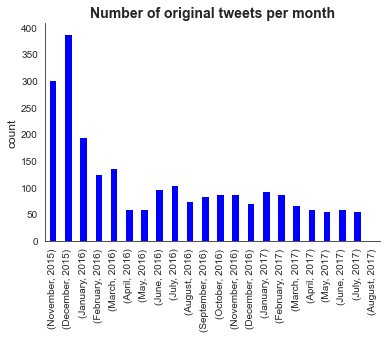

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.set_style("white")
tweets_per_month.plot(kind='bar', color='b')
ax.set_title('Number of original tweets per month', fontsize=14, fontweight="bold")
ax.set_ylabel('count', fontsize=12)
ax.set_xlabel('')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

November and December of 2015 were the most busy months for WeRateDogs twitter account with the number of original posted tweets exceeding 250 and 350 respectively. 

### Most used twitter app for posting tweets for WeRateDogs 

In [95]:
twitter_archive_master['source'].value_counts() / len(twitter_archive_master) * 100

Twitter for iPhone     92.699491
Vine - Make a Scene     3.862479
Twitter Web Client      1.400679
TweetDeck               0.424448
Name: source, dtype: float64

IPhone is the most used device for tweeting

## Most retweeted tweet

In [96]:
twitter_archive_master[twitter_archive_master['retweet_count'] == max(twitter_archive_master['retweet_count'])]

,tweet_id,text,rating_numerator,rating_denominator,name,url,stage,source,Date,Year,...,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
1039,744234799360020481,Here's a doggo realizing you can stand in a po...,13,10,None,https://t.co/7wE9LTEXC4,doggo,Twitter for iPhone,2016-06-18,2016,...,1.0,Ice_Bear,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True


 The most retweeted tweet was this https://t.co/7wE9LTEXC4 with 70,330 retweets. This tweet shows a dog swimming in a pool then it realizes that it can stand above water. You can confirm from the link.

## Most favourited

In [97]:
twitter_archive_master[twitter_archive_master.favorite_count == twitter_archive_master.favorite_count.max()]

,tweet_id,text,rating_numerator,rating_denominator,name,url,stage,source,Date,Year,...,image_number,top_prediction,top_pred_conf,is_dog_top_pred,second_prediction,second_pred_conf,is_dog_sec_pred,third_prediction,third_pred_conf,is_dog_third_pred
1039,744234799360020481,Here's a doggo realizing you can stand in a po...,13,10,None,https://t.co/7wE9LTEXC4,doggo,Twitter for iPhone,2016-06-18,2016,...,1.0,Ice_Bear,0.825333,True,Ice_Bear,0.044681,False,Whippet,0.018442,True


Apparently, it seems the most retweeted post is also the most favourited.